In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Creting a decision tree

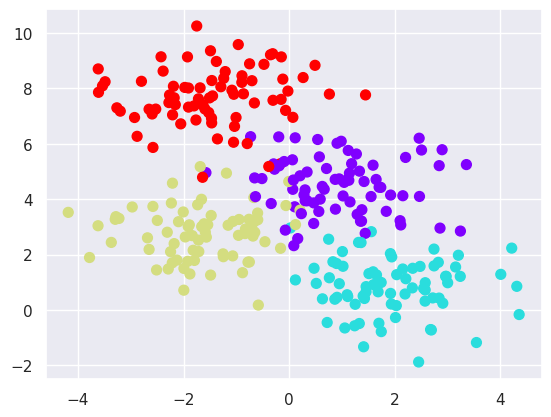

In [27]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=300,centers=4,random_state=0,cluster_std=1.0)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X,y)

In [29]:
def visualize_classifier(model,X,y,ax=None,cmap='rainbow'):
    ax = ax or plt.gca()
    #Plot training points
    ax.scatter(X[:,0],X[:,1],c=y,s=30,cmap=cmap,clim=(y.min(),y.max()),zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    #Fit the estimator
    model.fit(X,y)
    xx,yy = np.meshgrid(np.linspace(*xlim,num=200),np.linspace(*ylim,num=200))
    z = model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
    #Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx,yy,z,alpha=0.3,levels=np.arange(n_classes+1)-0.5,cmap=cmap,clim=(y.min(),y.max()),zorder=1)
    ax.set(xlim=xlim,ylim=ylim)

/tmp/ipykernel_59535/3260653789.py:15: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx,yy,z,alpha=0.3,levels=np.arange(n_classes+1)-0.5,cmap=cmap,clim=(y.min(),y.max()),zorder=1)


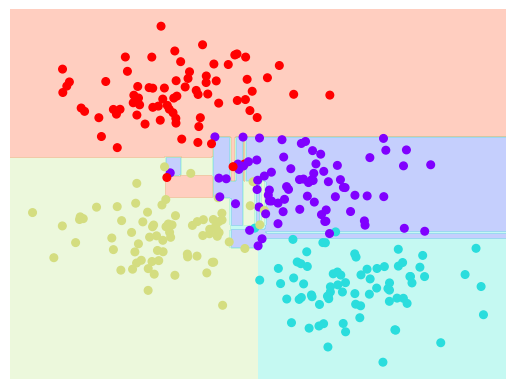

In [30]:
visualize_classifier(DecisionTreeClassifier(),X,y)

/tmp/ipykernel_59535/3260653789.py:15: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx,yy,z,alpha=0.3,levels=np.arange(n_classes+1)-0.5,cmap=cmap,clim=(y.min(),y.max()),zorder=1)


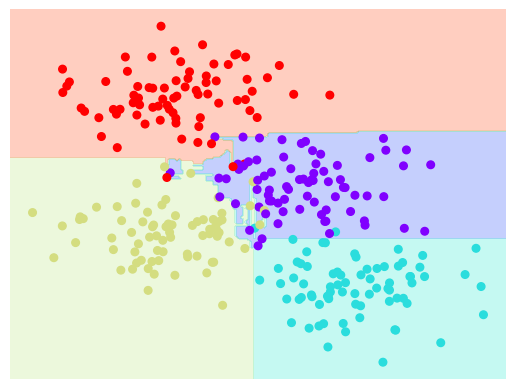

In [31]:
from sklearn.ensemble import BaggingClassifier

tree1 = DecisionTreeClassifier()
bag = BaggingClassifier(tree1,n_estimators=100,max_samples=0.8,random_state=1)
bag.fit(X,y)
visualize_classifier(bag,X,y)

/tmp/ipykernel_59535/3260653789.py:15: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx,yy,z,alpha=0.3,levels=np.arange(n_classes+1)-0.5,cmap=cmap,clim=(y.min(),y.max()),zorder=1)


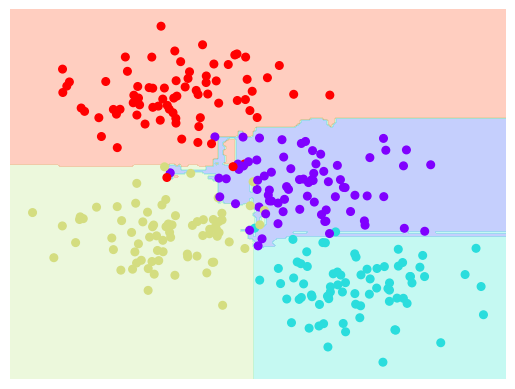

In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200,random_state=0,criterion='entropy')
visualize_classifier(model,X,y)

## Random Forest Regression

<ErrorbarContainer object of 3 artists>

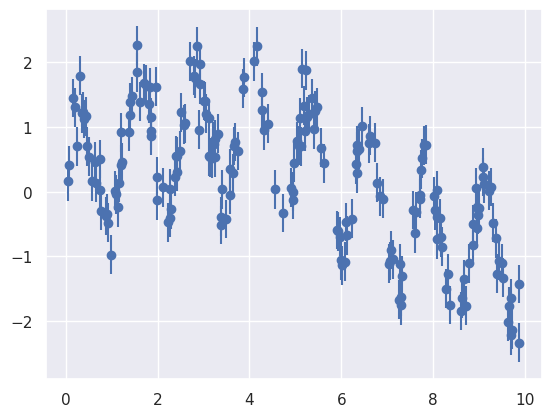

In [33]:
rng = np.random.RandomState(42)

x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x,y,0.3,fmt='o')

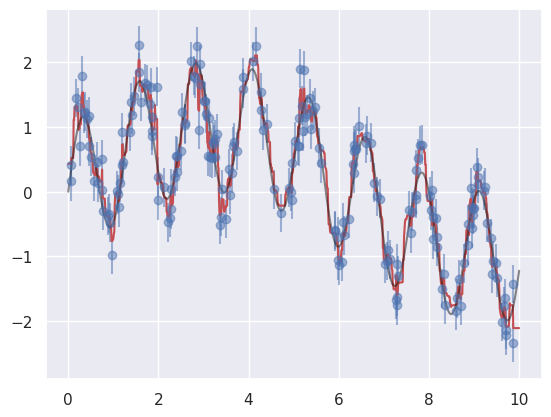

In [34]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r')
plt.plot(xfit, ytrue, '-k', alpha=0.5)